# Lab - Least Squares Regression

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([15,32,66,45,90,153,170,200])

In [3]:
%matplotlib inline

Create a scatter graph

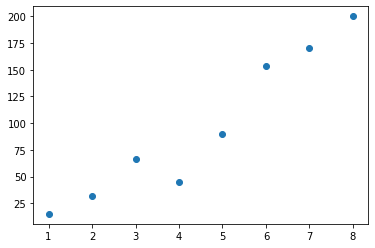

In [7]:
plt.scatter(x, y)

To create a linear regression model we need to build a simple linear function:

# Y = mX + b

## $m = \frac{N * \sum (xy) - \sum (x)\sum (y)}{N * \sum X^{2}-(\sum x)^{2}}$

## $b = \frac{\sum y - m\sum x}{N}$

Compute all the elements

Compute the slope (m) in one line

Compute b

Write a function fn - F(x)

Draw graph to see the result, combine the scatter and the regression line

Write a function to generate linear regression model based on 2 vectors
<br/>
use a closure to generate a function dynamically

Test your function

Use linear algebra package from numpy to do the same task